In [1]:
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#set jp options
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 300)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#import data
df = pd.read_csv('../data/vets_SOF.csv',  encoding="ISO-8859-1")

In [3]:
#create DataFrame with only SOF members
tribes = df[(df['Tribe'] != 'Non-SOF')&(df['Tribe'] != 'SOF Enabler')]

In [6]:
#create quick and dirty percent function to calculate percentages
def percent(df):
    divisor = sum(df)
    return round(df/sum(df) * 100, 2)

In [10]:
#create branch logs and then remove Coast Guard
branches = df['Branch'].unique()[:4]
tribes = tribes[tribes['Branch'] != 'Coast Guard']

In [14]:
plt.style.use('grayscale')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']

# First Plot of Community Makeup

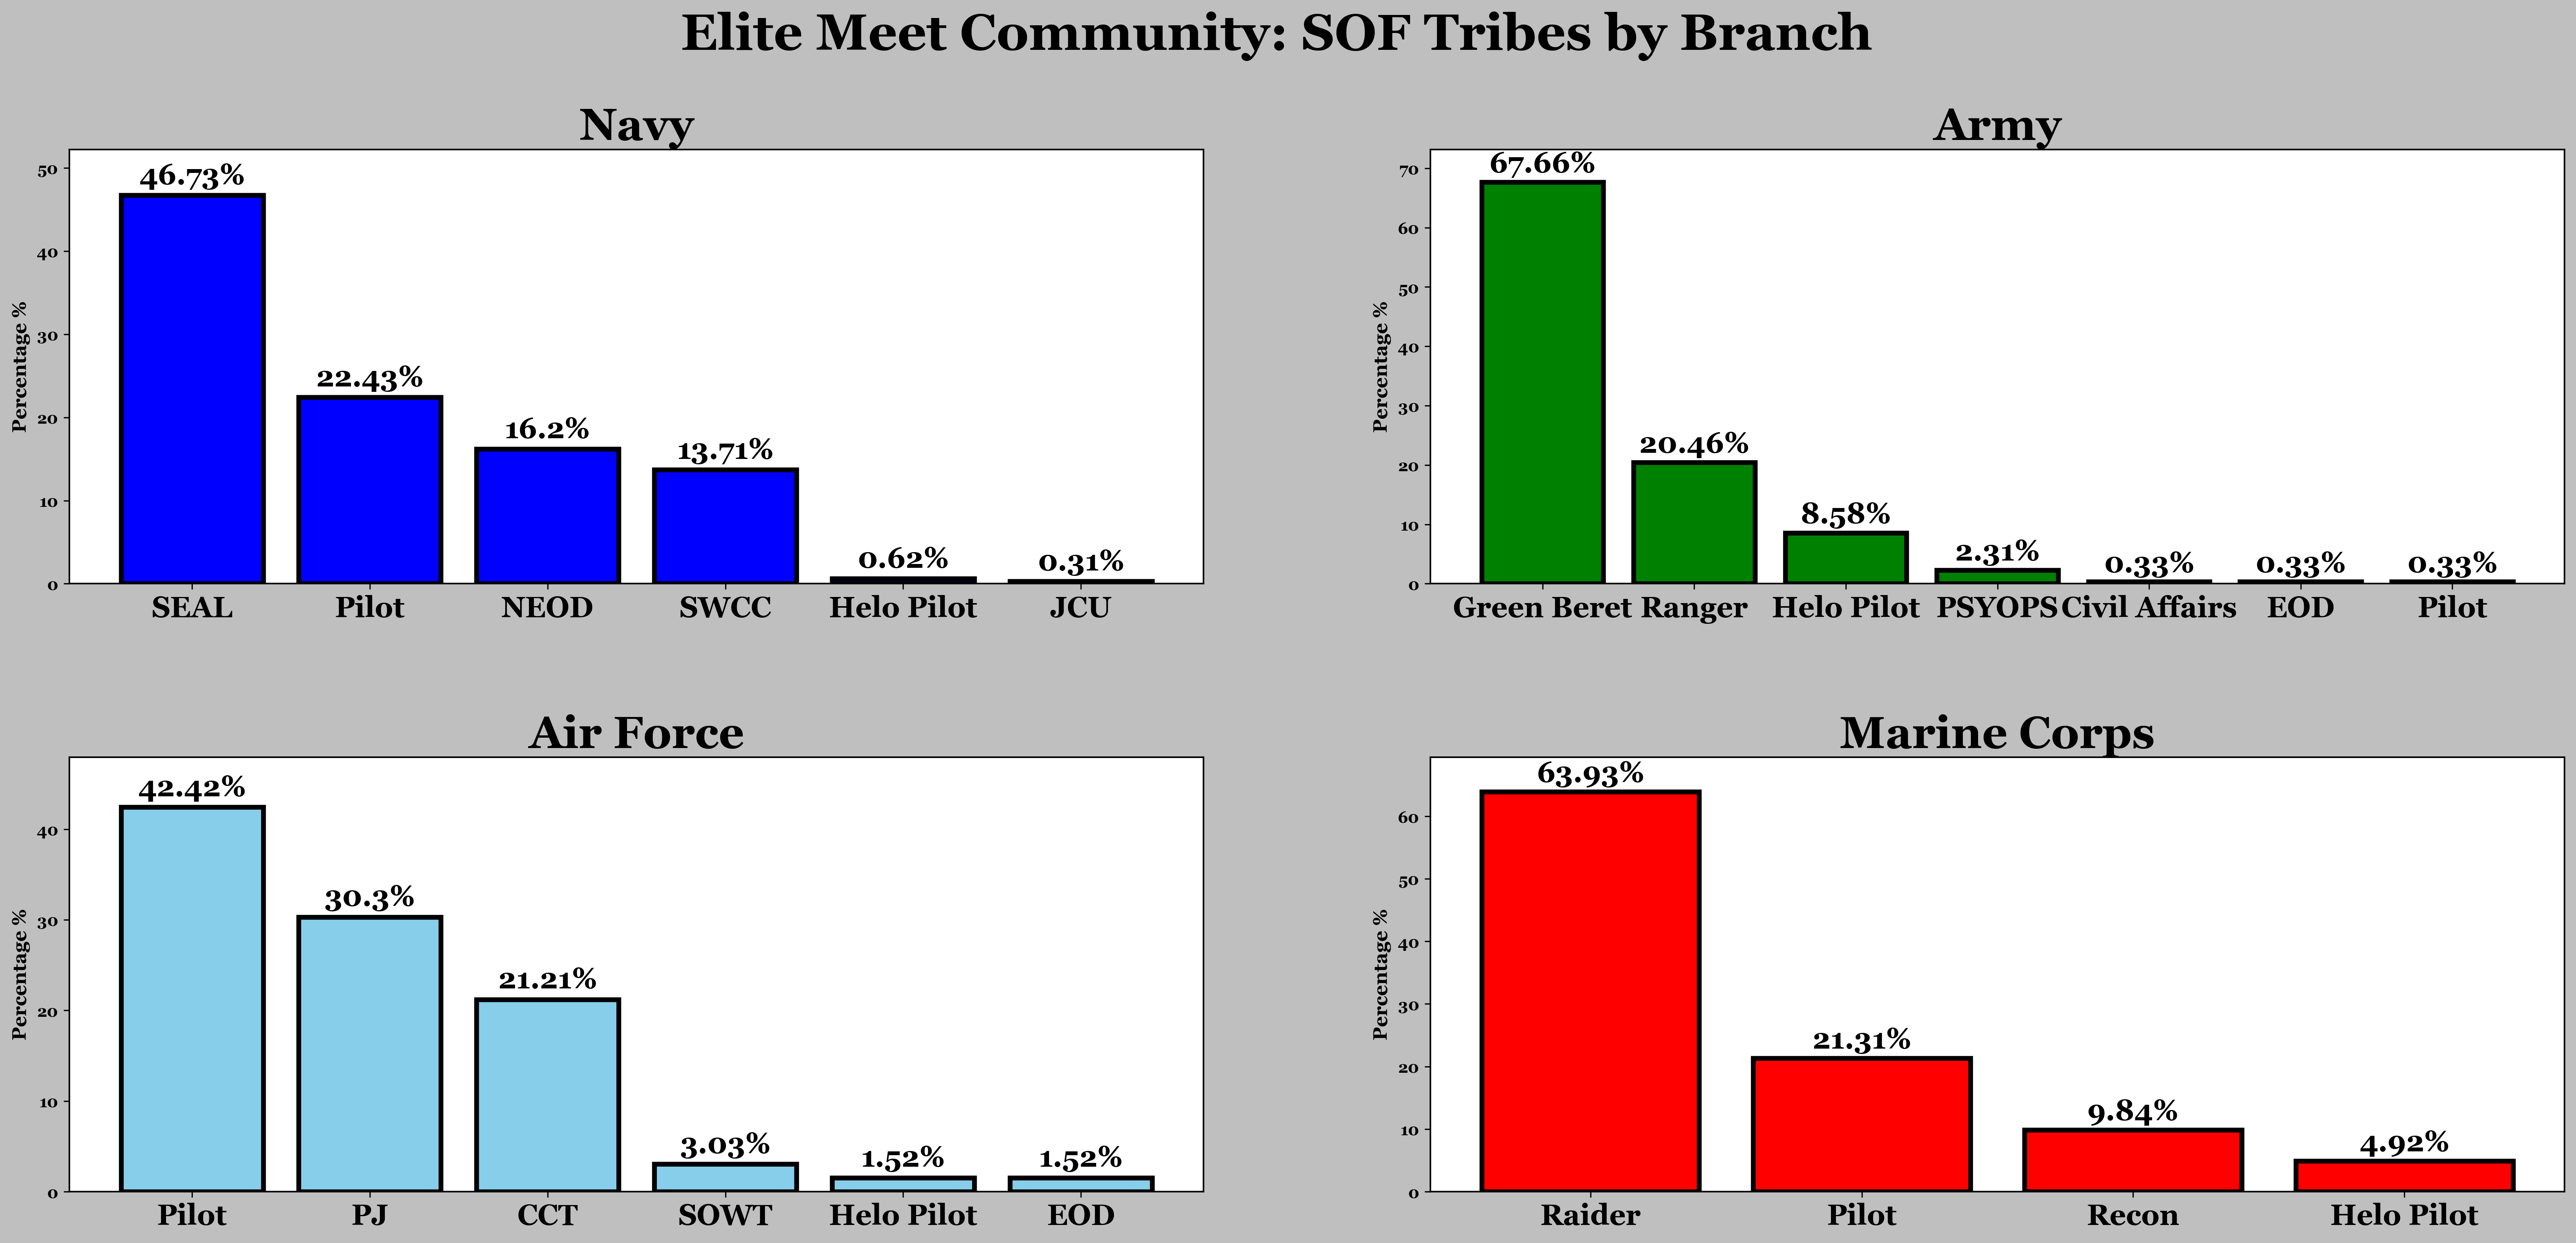

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(28,12))
suptitle = fig.suptitle('Elite Meet Community: SOF Tribes by Branch', fontweight='bold', fontsize=32)

colors = ['blue', 'green', 'skyblue', 'red']
for i, branch in enumerate(branches):
    ax = fig.add_subplot(2,2,i+1)
    ax.grid(False)
    df = percent(tribes[tribes['Branch'] == branch]['Tribe'].value_counts())
    _ = plt.bar(x=df.index, height=df.values, data=df, color=colors[i], edgecolor='k', linewidth=3)
    
    rects = _.patches
    
    # Make some labels.
    labels = [f"{value}%" for value in df.values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        txt = plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5 , label,
                ha='center', va='bottom', fontweight='bold', fontsize=18)
    _ = fig.subplots_adjust(left=None, bottom=None, right=None, wspace=None, hspace=0.4)
    title = ax.set_title(f'{branch}', fontsize=28, fontweight='bold')
    xticks = plt.xticks(fontweight='bold', fontsize=18)
    yticks = plt.yticks(fontweight='bold')
    #xlabel = plt.xlabel('Tribe', fontweight='bold', fontsize=14, labelpad=20)
    ylabel = plt.ylabel('Percentage %', fontweight='bold')
    ylim = plt.ylim(0,max(df.values) + 5.5)


# Second Community Makeup Plot (Treemap)

In [17]:
import squarify as sq

In [20]:
#breakout value counts of SOF tribes and branches
tribe_counts = tribes['Tribe'].value_counts()
branch_counts = tribes['Branch'].value_counts()

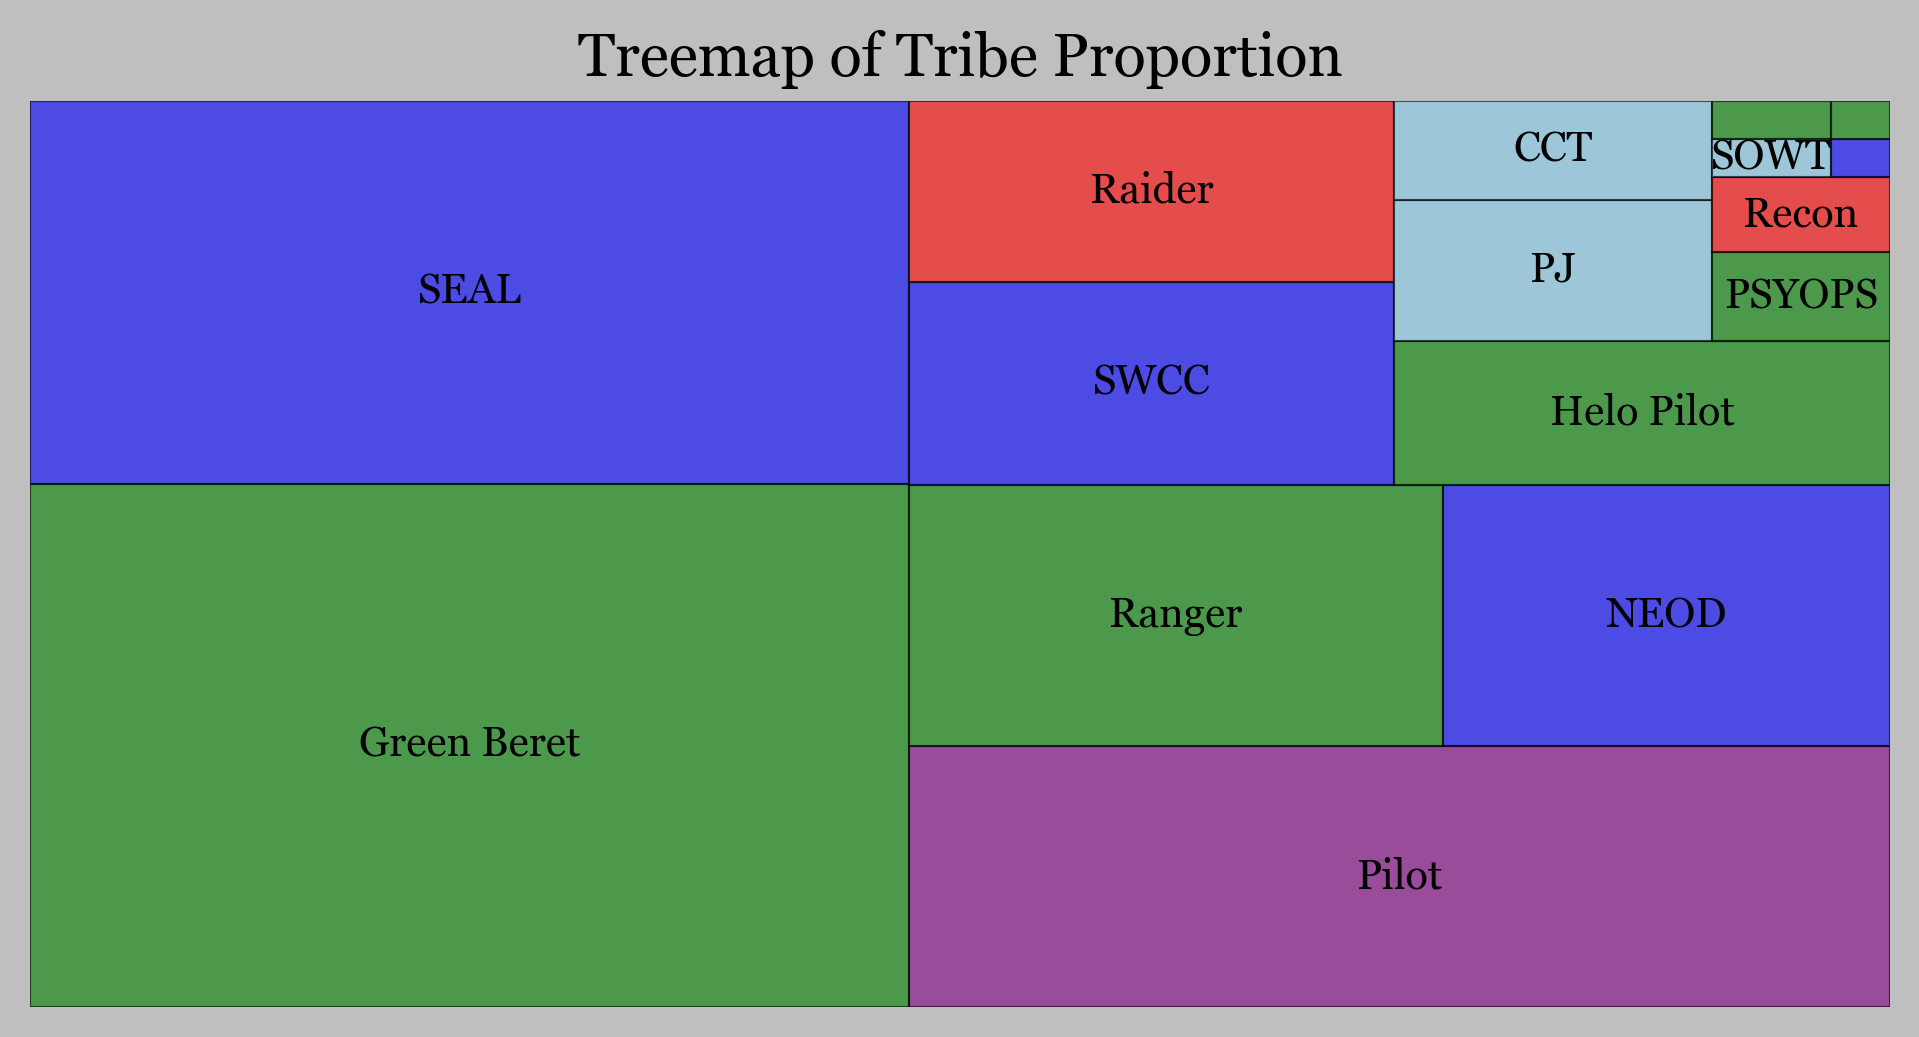

In [27]:
fig = plt.figure(figsize=(8,4))
sizes=tribe_counts.values
label=tribe_counts.index[:13]
colors=['green', 'blue', 'purple', 'green', 'blue', 'blue', 'red', 'green', 'skyblue', 'skyblue', 'green', 'red', 'skyblue', 'green', 'blue', 'green']
plot = sq.plot(sizes=sizes, label=label, color=colors, alpha=0.6, edgecolor='black')
grid = plt.axis('off')
title = plt.title('Treemap of Tribe Proportion')

# Now combining the two

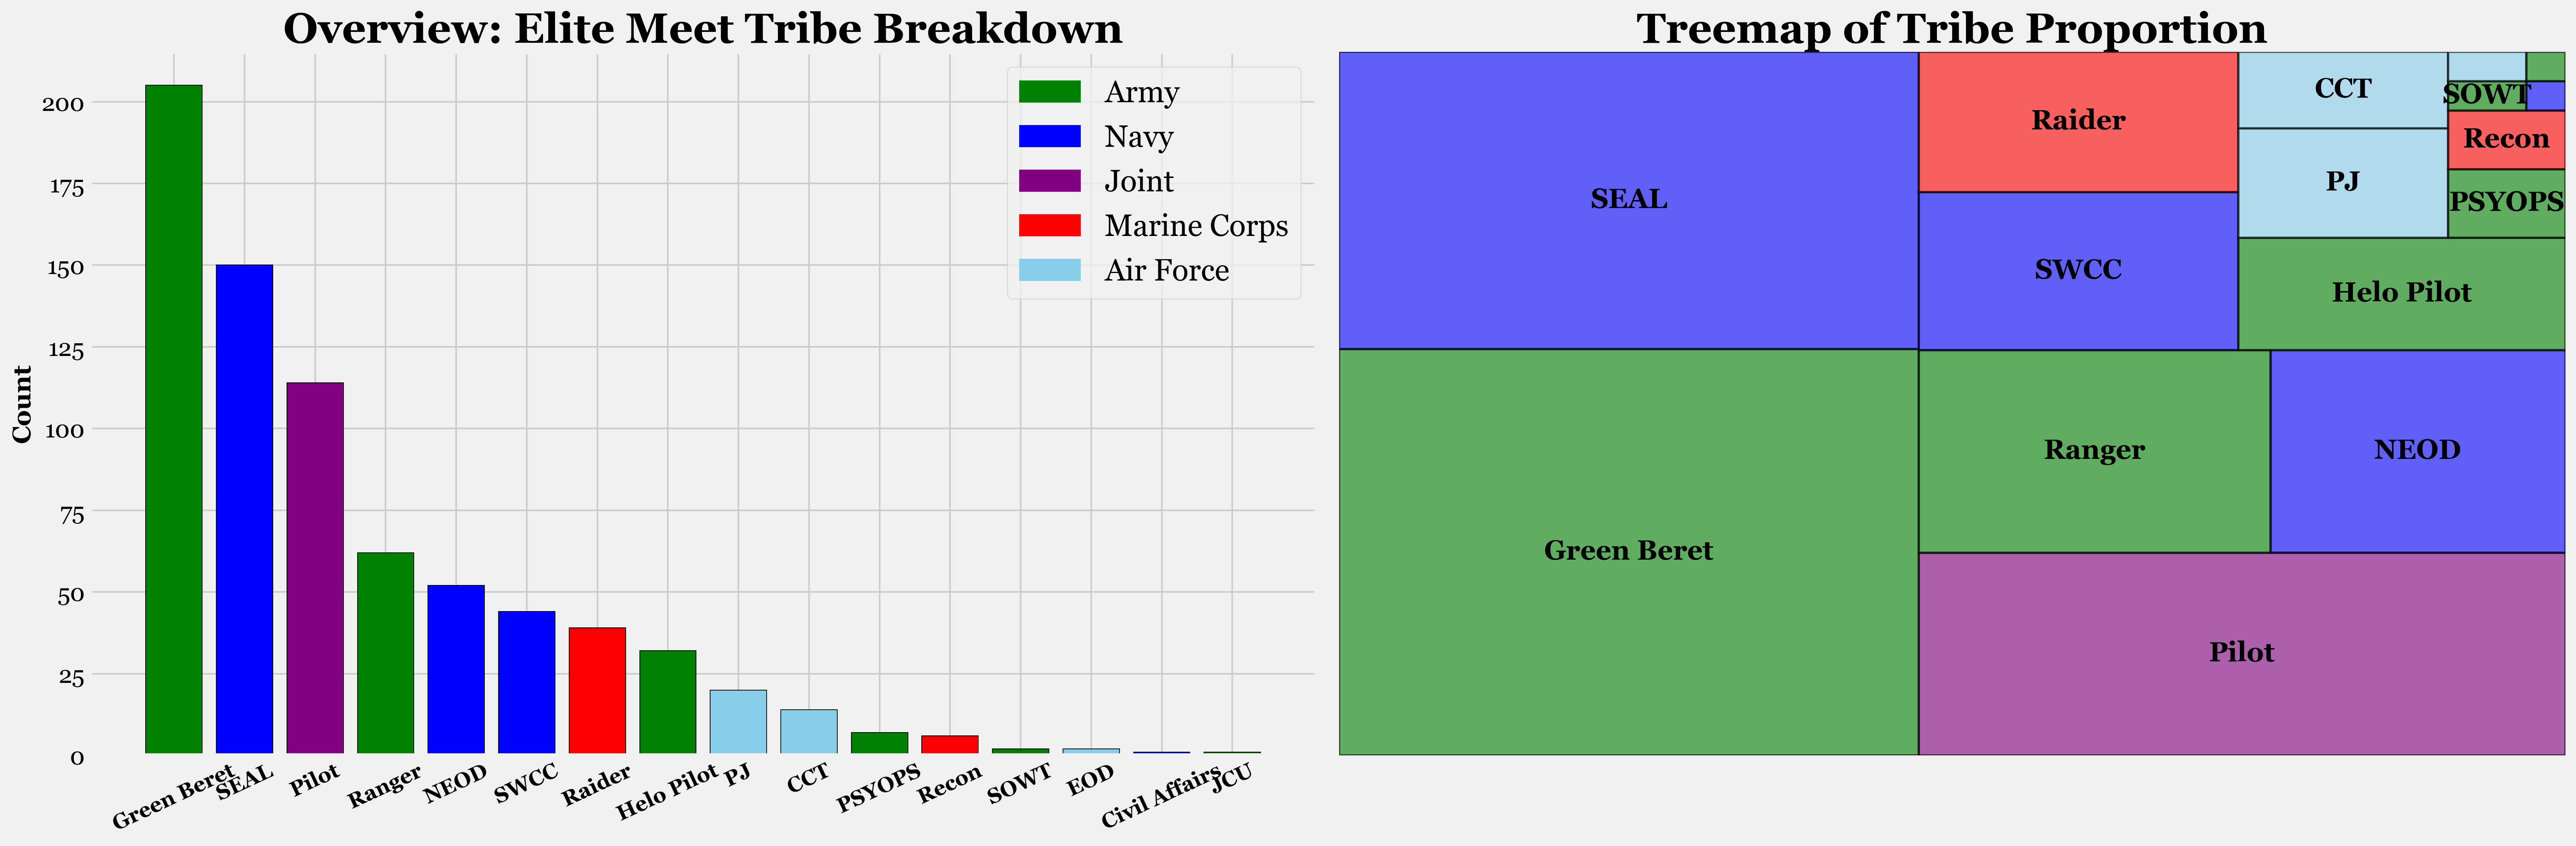

In [31]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(24,8))
plt.style.use('fivethirtyeight')
colors=['green', 'blue', 'purple', 'green', 'blue', 'blue', 'red', 'green', 'skyblue', 'skyblue', 'green', 'red', 'green', 'skyblue', 'blue', 'green']

_ = plt.subplot(1,2,1)
plot = plt.bar(tribe_counts.index, tribe_counts.values, color=colors, edgecolor='black')
ticks = plt.xticks(fontsize=14, rotation=25,fontweight='bold')
yticks = plt.yticks(fontsize=16)
ptitle = plt.title('Overview: Elite Meet Tribe Breakdown', fontweight='bold', fontsize=28)
ylabel = plt.ylabel('Count', fontweight='bold')
green_patch = mpatches.Patch(color='green', label='Army')
red_patch = mpatches.Patch(color='red', label='Marine Corps')
blue_patch = mpatches.Patch(color='blue', label='Navy')
ppl_patch = mpatches.Patch(color='purple', label='Joint')
skyblue_patch = mpatches.Patch(color='skyblue', label='Air Force')

legend = plt.legend(handles=[green_patch, blue_patch, ppl_patch, red_patch, skyblue_patch], fontsize='x-large')

_ = plt.subplot(1,2,2)
sizes=tribe_counts.values
label=tribe_counts.index[:13]
plot = sq.plot(sizes=sizes, label=label, color=colors, text_kwargs={'fontsize':18, 'fontweight':'bold'}, alpha=0.6, lw=1.5, edgecolor='black')
grid = plt.axis('off')
title = plt.title('Treemap of Tribe Proportion', fontsize=28, fontweight='bold')
plt.tight_layout()

In [33]:
tribes.to_csv('../data/tribes.csv', index=False)